In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../../data/p_comment.csv')
df1 = pd.read_csv('../../data/p_content.csv')
result = pd.merge(df, df1, on="ID_GodotObject")[['ID_Posting', 'publishingDate', 'ID_GodotObject']]
result['publishingDate'] = pd.to_datetime(result['publishingDate'])
result['month'] = result['publishingDate'].dt.month
result['year'] = result['publishingDate'].dt.year
result.head()

,ID_Posting,publishingDate,ID_GodotObject,month,year
0,1051994953,2020-03-30 05:36:31.240,2000116305030,3,2020
1,1051995032,2020-03-30 05:36:31.240,2000116305030,3,2020
2,1051995057,2020-03-30 05:36:31.240,2000116305030,3,2020
3,1051995172,2020-03-30 05:36:31.240,2000116305030,3,2020
4,1051995270,2020-03-30 05:36:31.240,2000116305030,3,2020


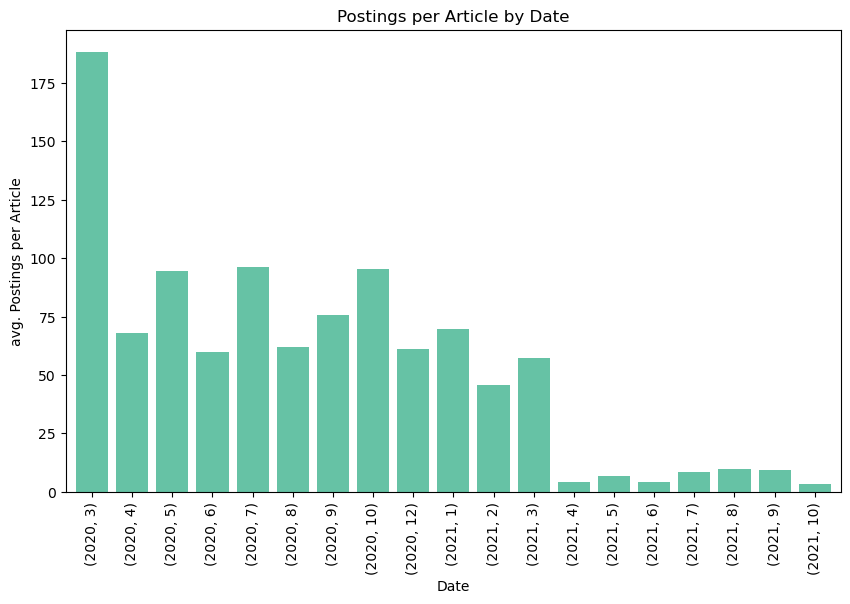

year  month
2020  3        753
      4        542
      5        568
      6         60
      7        192
Name: ID_Posting, dtype: int64
year  month
2020  3        4
      4        8
      5        6
      6        1
      7        2
Name: ID_GodotObject, dtype: int64


In [4]:
postings = result.groupby(['year','month'])['ID_Posting'].count()
articles = result.groupby(['year','month'])['ID_GodotObject'].nunique()
# Divide the number of postings by the number of articles to get the ratio of postings to articles
ratio = postings / articles

# Plot the ratio as a bar chart
ratio.plot.bar(figsize=(10,6), color=plt.cm.Set2.colors[0], width=0.8)

# Add a title and axis labels
plt.title('Postings per Article by Date')
plt.xlabel('Date')
plt.ylabel('avg. Postings per Article')

# Show the plot
plt.savefig('postings_per_article.png', bbox_inches='tight', dpi=300)
plt.show()

print(postings.head())
print(articles.head())

In [5]:
#find viral article groups
df2 = pd.read_csv('../../data/feature/knn_clustering.csv')
result1 = pd.merge(result, df2, on="ID_GodotObject")
result1.head()

,ID_Posting,publishingDate,ID_GodotObject,month,year,cluster_value
0,1051994953,2020-03-30 05:36:31.240,2000116305030,3,2020,3
1,1051995032,2020-03-30 05:36:31.240,2000116305030,3,2020,3
2,1051995057,2020-03-30 05:36:31.240,2000116305030,3,2020,3
3,1051995172,2020-03-30 05:36:31.240,2000116305030,3,2020,3
4,1051995270,2020-03-30 05:36:31.240,2000116305030,3,2020,3


year  month  cluster_value
2020  3      2                  7.0
             3                449.0
             4                278.0
             6                 19.0
      4      0                 13.0
dtype: float64
year  month  cluster_value
2020  3      2                  7
             3                449
             4                278
             6                 19
      4      0                 13
Name: ID_Posting, dtype: int64
year  month  cluster_value
2020  3      2                1
             3                1
             4                1
             6                1
      4      0                1
Name: ID_GodotObject, dtype: int64


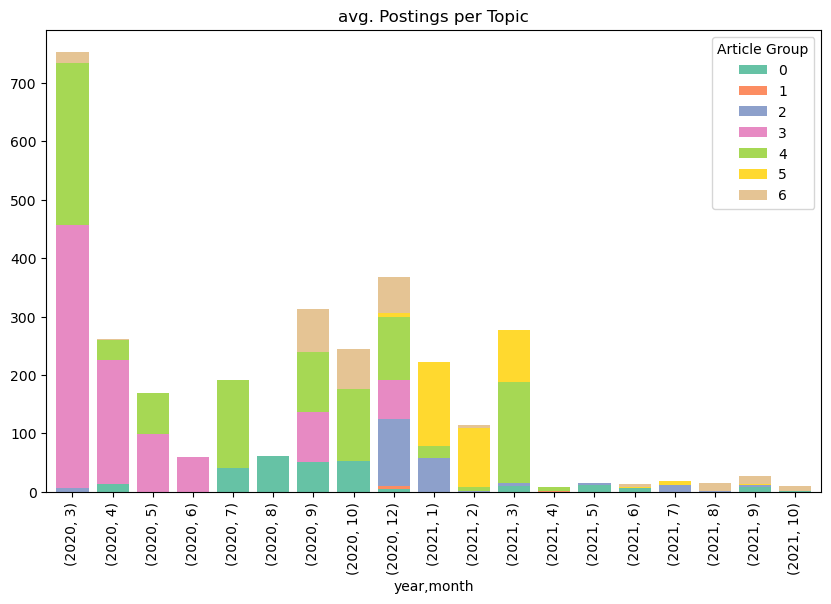

In [6]:
postings = result1.groupby(['year','month','cluster_value'])['ID_Posting'].count()
articles = result1.groupby(['year','month', 'cluster_value'])['ID_GodotObject'].nunique()
# Divide the number of postings by the number of articles to get the ratio of postings to articles
ratio = postings / articles

print(ratio.head())
print(postings.head())
print(articles.head())

df_gb = ratio.unstack()
df_gb.plot(kind='bar', stacked=True, figsize=(10,6), color=plt.cm.Set2.colors, width=0.8)
# Get the legend object
legend = plt.legend()
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
# Change the legend title
legend.set_title('Article Group')
# Add a title to the plot
plt.title('avg. Postings per Topic')

# Show the plot
plt.savefig('cluster-dist-plot.png', bbox_inches='tight', dpi=300)
plt.show()